<a href="https://colab.research.google.com/github/Nik8x/R_Practice/blob/main/ride_share_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library('readxl') # package to read excel file
install.packages("car") # installing package
library('car') #  package for the 'some' function
library("dplyr") # package for the 'select_if' function
library(knitr)
library(tidyverse, warn.conflict=F)
install.packages("corrplot") # to find correlation
library('corrplot')
install.packages("psych")
library('psych') # visual scatterplot matrix
library('boot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [ ]:
df <- read_excel('/content/Rideshare.xlsx') # loading data into a dataframe variable
dim(df) # dimensions of the dataframe
head(df, 2) # show top 2 records

[1] 19160    20

Id,dateTime,hour,day,month,weekday,source,destination,rideshare,rideCategory,price,distance,surgeMultiplier,weather,temperature,precipProbability,humidity,windSpeed,windGust,ozone
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9f18e,2020-10-26 11:33:00,11,26,10,Mon,Boston University,Back Bay,Lyft,shared,3.6,1.836,1,cloudy,40.75,0,0.67,9.56,14.37,352.9
ad740,2020-10-16 11:45:00,11,16,10,Fri,Haymarket Square,Beacon Hill,Lyft,shared,3.6,1.668,1,partly-cloudy-night,26.11,0,0.49,14.93,24.96,367.5


In [ ]:
str(df) # structure of the dataframe

tibble [19,160 × 20] (S3: tbl_df/tbl/data.frame)
 $ Id               : chr [1:19160] "9f18e" "ad740" "ade01" "0f260" ...
 $ dateTime         : POSIXct[1:19160], format: "2020-10-26 11:33:00" "2020-10-16 11:45:00" ...
 $ hour             : num [1:19160] 11 11 21 6 2 14 6 18 13 6 ...
 $ day              : num [1:19160] 26 16 26 25 27 15 1 27 25 1 ...
 $ month            : num [1:19160] 10 10 10 10 10 10 10 10 10 10 ...
 $ weekday          : chr [1:19160] "Mon" "Fri" "Mon" "Sun" ...
 $ source           : chr [1:19160] "Boston University" "Haymarket Square" "South Station" "Fenway" ...
 $ destination      : chr [1:19160] "Back Bay" "Beacon Hill" "Financial District" "Back Bay" ...
 $ rideshare        : chr [1:19160] "Lyft" "Lyft" "Lyft" "Lyft" ...
 $ rideCategory     : chr [1:19160] "shared" "shared" "Lyft" "Shared" ...
 $ price            : num [1:19160] 3.6 3.6 3.6 3.6 3.6 3.6 4.32 4.32 4.32 4.32 ...
 $ distance         : num [1:19160] 1.84 1.67 0.78 1.76 1.18 ...
 $ surgeMultiplier  : n

In [ ]:
summary(df) # summary of all the variables of the dataframe

      Id               dateTime                           hour      
 Length:19160       Min.   :2020-08-01 04:57:00.00   Min.   : 0.00  
 Class :character   1st Qu.:2020-11-02 00:02:00.00   1st Qu.: 6.00  
 Mode  :character   Median :2020-11-15 00:27:30.00   Median :12.00  
                    Mean   :2020-11-13 19:00:03.99   Mean   :11.61  
                    3rd Qu.:2020-11-25 23:54:00.00   3rd Qu.:17.00  
                    Max.   :2020-12-28 19:53:00.00   Max.   :23.00  
      day            month         weekday             source         
 Min.   : 1.00   Min.   : 8.00   Length:19160       Length:19160      
 1st Qu.:11.00   1st Qu.:11.00   Class :character   Class :character  
 Median :15.00   Median :11.00   Mode  :character   Mode  :character  
 Mean   :16.19   Mean   :10.91                                        
 3rd Qu.:26.00   3rd Qu.:11.00                                        
 Max.   :28.00   Max.   :12.00                                        
 destination        

In [ ]:
some(df, 5) # to observe random obervations from the dataframe

Id,dateTime,hour,day,month,weekday,source,destination,rideshare,rideCategory,price,distance,surgeMultiplier,weather,temperature,precipProbability,humidity,windSpeed,windGust,ozone
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1b5d4,2020-09-15 11:45:00,11,15,9,Tue,Financial District,North End,Uber,UberX,10.08,1.452,1,cloudy,36.27,0.16,0.91,7.30,8.16,324.1
b6274,2020-11-01 07:03:00,7,1,11,Sun,North Station,Northeastern University,Uber,UberPool,15.84,3.960,1,cloudy,39.81,0.00,0.83,2.60,4.82,267.3
ddac4,2020-11-11 10:20:00,10,11,11,Wed,South Station,North Station,Uber,UberPool,15.84,1.896,1,clear-night,21.78,0.00,0.64,2.87,3.20,325.2
8d200,2020-11-11 09:35:00,9,11,11,Wed,North Station,North End,Lyft,Black SUV,15.84,1.248,1,clear-night,21.63,0.00,0.64,3.27,3.32,325.0
a30cb,2020-11-01 00:28:00,0,1,11,Sun,Haymarket Square,Back Bay,Lyft,Lyft,46.80,2.868,1,cloudy,40.12,0.00,0.62,3.16,3.51,286.6


In [ ]:
sapply(df, function(x){sum(is.na(x))}) # check for any missing data

Id          dateTime              hour               day 
                0                 0                 0                 0 
            month           weekday            source       destination 
                0                 0                 0                 0 
        rideshare      rideCategory             price          distance 
                0                 0                 0                 0 
  surgeMultiplier           weather       temperature precipProbability 
                0                 0                 0                 0 
         humidity         windSpeed          windGust             ozone 
                0                 0                 0                 0

In [ ]:
# dropping columns which are not that relevant
df$Id <- NULL
df$dateTime <- NULL

In [ ]:
cor(select_if(df, is.numeric), use="complete.obs") # correlation

,hour,day,month,price,distance,surgeMultiplier,temperature,precipProbability,humidity,windSpeed,windGust,ozone
hour,1.0000000000,6.913393e-02,-0.002066911,6.790751e-04,0.0032677612,-7.610290e-03,0.2115333778,-0.134195564,-0.272827599,0.076771110,0.0837521396,3.735432e-02
day,0.0691339260,1.000000e+00,0.012398503,7.505854e-05,0.0062986370,-7.627682e-04,-0.0706371781,0.031511225,-0.086045264,0.442797251,0.4057865279,3.685454e-01
month,-0.0020669114,1.239850e-02,1.000000000,2.889648e-01,0.1438984665,3.684875e-02,-0.0015909446,0.003322615,0.003696817,0.005181986,0.0055554462,-1.151522e-03
price,0.0006790751,7.505854e-05,0.288964759,1.000000e+00,0.3073892582,1.456273e-01,0.0182051983,0.008757253,0.008693709,0.008559312,0.0078999988,-8.297300e-03
distance,0.0032677612,6.298637e-03,0.143898466,3.073893e-01,1.0000000000,-1.692802e-04,0.0022966632,0.000939794,-0.007899776,0.015481680,0.0177077393,1.079536e-02
surgeMultiplier,-0.0076102905,-7.627682e-04,0.036848754,1.456273e-01,-0.0001692802,1.000000e+00,-0.0008151679,-0.014881842,-0.004659023,-0.001441964,-0.0001613714,1.425077e-05
temperature,0.2115333778,-7.063718e-02,-0.001590945,1.820520e-02,0.0022966632,-8.151679e-04,1.0000000000,0.246338162,0.323609758,0.075830511,0.0073330826,-2.880941e-01
precipProbability,-0.1341955639,3.151123e-02,0.003322615,8.757253e-03,0.0009397940,-1.488184e-02,0.2463381615,1.000000000,0.550243844,0.258093422,0.1277570543,-2.411719e-01
humidity,-0.2728275991,-8.604526e-02,0.003696817,8.693709e-03,-0.0078997759,-4.659023e-03,0.3236097580,0.550243844,1.000000000,-0.197266978,-0.3030777016,-4.282539e-01
windSpeed,0.0767711097,4.427973e-01,0.005181986,8.559312e-03,0.0154816801,-1.441964e-03,0.0758305110,0.258093422,-0.197266978,1.000000000,0.9381012709,5.307951e-01


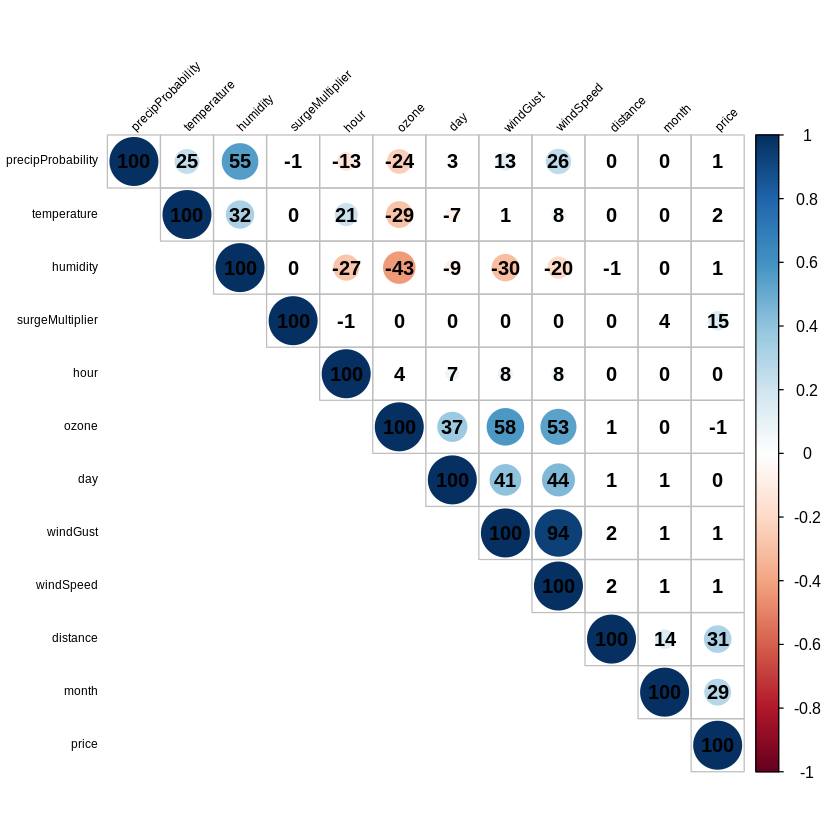

In [ ]:
# correlation heatmap
cor_df = cor(select_if(df, is.numeric))
#plot cor matrix
corrplot(cor_df,  order="AOE",
                           method="circle", tl.pos="lt", type="upper",
          tl.col="black", tl.cex=0.6, tl.srt=45,
         addCoef.col="black", addCoefasPercent = TRUE,
          insig = "blank")

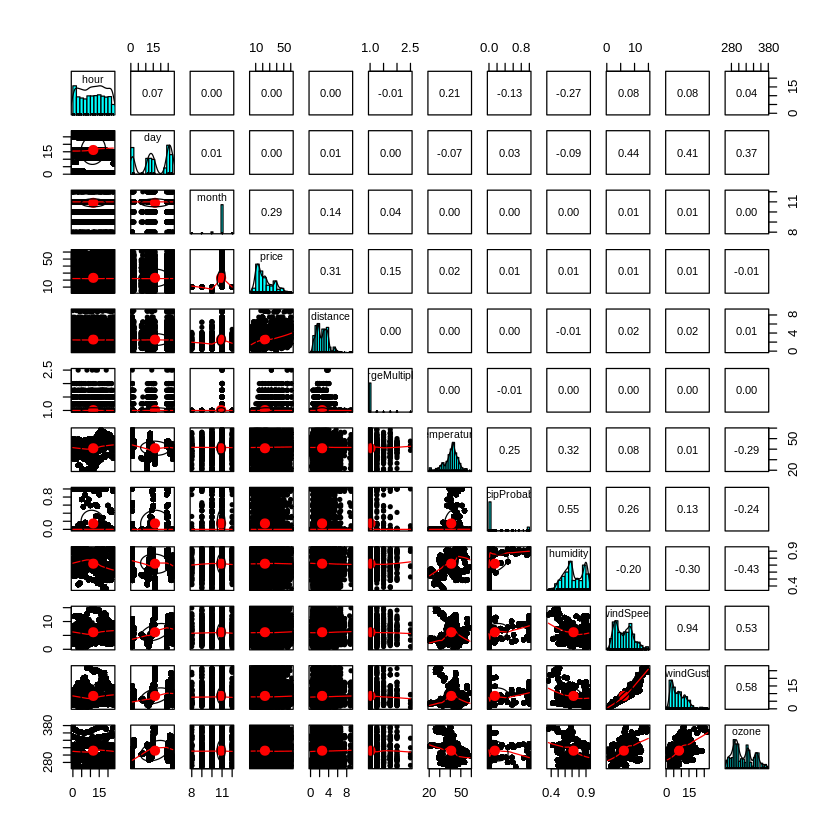

In [ ]:
pairs.panels(select_if(df, is.numeric)) # visual scatterplot matrix

In [ ]:
# converting categorical data to factors
df$weekday <- as.factor(df$weekday)
df$source <- as.factor(df$source)
df$destination <- as.factor(df$destination)
df$rideshare <- as.factor(df$rideshare)
df$rideCategory <- as.factor(df$rideCategory)
df$weather <- as.factor(df$weather)

In [ ]:
str(df)

tibble [19,160 × 18] (S3: tbl_df/tbl/data.frame)
 $ hour             : num [1:19160] 11 11 21 6 2 14 6 18 13 6 ...
 $ day              : num [1:19160] 26 16 26 25 27 15 1 27 25 1 ...
 $ month            : num [1:19160] 10 10 10 10 10 10 10 10 10 10 ...
 $ weekday          : Factor w/ 7 levels "Fri","Mon","Sat",..: 2 1 2 4 6 5 5 6 4 5 ...
 $ source           : Factor w/ 12 levels "Back Bay","Beacon Hill",..: 3 6 10 4 7 6 1 6 1 7 ...
 $ destination      : Factor w/ 12 levels "Back Bay","Beacon Hill",..: 1 2 5 1 8 1 9 12 4 8 ...
 $ rideshare        : Factor w/ 2 levels "Lyft","Uber": 1 1 1 1 1 2 1 1 1 1 ...
 $ rideCategory     : Factor w/ 14 levels "Black","Black SUV",..: 8 8 6 9 9 11 7 4 9 5 ...
 $ price            : num [1:19160] 3.6 3.6 3.6 3.6 3.6 3.6 4.32 4.32 4.32 4.32 ...
 $ distance         : num [1:19160] 1.84 1.67 0.78 1.76 1.18 ...
 $ surgeMultiplier  : num [1:19160] 1 1 1 1 1 1 1 1 1 1 ...
 $ weather          : Factor w/ 7 levels "clear-day","clear-night",..: 3 6 3 7 6 3 4 5 7

In [ ]:
# fitting the model
model <- glm(price ~ . -price, data = df)
summary(model)


Call:
glm(formula = price ~ . - price, data = df)

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -80.087757   3.209955 -24.950  < 2e-16 ***
hour                                 0.003599   0.014729   0.244   0.8069    
day                                 -0.006474   0.014139  -0.458   0.6471    
month                                7.154695   0.221422  32.312  < 2e-16 ***
weekdayMon                          -0.710916   0.436151  -1.630   0.1031    
weekdaySat                           0.064845   0.367845   0.176   0.8601    
weekdaySun                           0.251748   0.361319   0.697   0.4860    
weekdayThu                           0.034338   0.316090   0.109   0.9135    
weekdayTue                          -0.806726   0.446181  -1.808   0.0706 .  
weekdayWed                           0.192708   0.349557   0.551   0.5814    
sourceBeacon Hill                  

In [ ]:
# feature selection
model1 = step(model)

Start:  AIC=147081.3
price ~ (hour + day + month + weekday + source + destination + 
    rideshare + rideCategory + distance + surgeMultiplier + weather + 
    temperature + precipProbability + humidity + windSpeed + 
    windGust + ozone) - price

                    Df Deviance    AIC
- weather            6  2405170 147073
- destination       10  2406853 147079
- ozone              1  2404660 147079
- hour               1  2404665 147079
- windSpeed          1  2404678 147079
- day                1  2404684 147080
- precipProbability  1  2404688 147080
- humidity           1  2404690 147080
- windGust           1  2404736 147080
- source            10  2407027 147080
<none>                  2404658 147081
- weekday            6  2406240 147082
- temperature        1  2405246 147084
- rideshare          1  2411516 147134
- rideCategory      13  2433366 147283
- surgeMultiplier    1  2447657 147419
- distance           1  2528663 148043
- month              1  2536101 148099

Step:  AI

In [ ]:
# fitting the model
model2 <- glm(price ~ weekday + temperature + rideshare + rideshare + surgeMultiplier + month + distance , data = df)
summary(model2)


Call:
glm(formula = price ~ weekday + temperature + rideshare + rideshare + 
    surgeMultiplier + month + distance, data = df)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -88.01078    2.54179 -34.626   <2e-16 ***
weekdayMon       -0.70654    0.37941  -1.862   0.0626 .  
weekdaySat        0.05674    0.31731   0.179   0.8581    
weekdaySun        0.19193    0.27035   0.710   0.4777    
weekdayThu       -0.16467    0.29492  -0.558   0.5766    
weekdayTue       -0.99013    0.39636  -2.498   0.0125 *  
weekdayWed        0.10545    0.30093   0.350   0.7260    
temperature       0.03107    0.01296   2.397   0.0165 *  
rideshareUber    -1.99466    0.16655 -11.977   <2e-16 ***
surgeMultiplier  17.61801    0.94682  18.608   <2e-16 ***
month             7.94225    0.21440  37.044   <2e-16 ***
distance          2.56623    0.06257  41.016   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian

In [ ]:
# model cross validation
set.seed(1234)
model_cv <- cv.glm(df, model2, K = 10)
model_cv
model_cv$delta # mse

$call
cv.glm(data = df, glmfit = model2, K = 10)

$K
[1] 10

$delta
[1] 127.4915 127.4819

$seed
  [1]       10403         624 -1394370482 -1723143049  2071488076  1659356893
  [7] -1081051142   885114163  -614367016   561456377   -29212570   951631791
 [13] -1923325404  1176136405  -446079598  1823627243  1899124272 -1981844367
 [19]   894106494  2001652199  1413441788   404217293  1596786218 -2037902941
 [25] -1250007416   670368489  1933715862  -777131233 -1470833964  -169607227
 [31]  2069221826  -249441701 -1575022112  2024386657  -298308946  -942472361
 [37] -1099163732  -297881411 -1477828518  2054846995  -967198664   476798169
 [43] -1836491066 -1332284785    96501636  -517746507  -335785486   455665867
 [49] -1134577264  1856235601  -732027426   -47277881 -1260817828  1330331565
 [55] -1859467638   836763267  1322153448   221852361 -1322590218  -324348417
 [61]   128602164   430497189   -48243166   787389243  1311722816  1343036481
 [67]  -516952818 -1351054793   750942476   8

[1] 127.4915 127.4819

In [ ]:
# price prediction
round(predict(model2))[1:10]
df$price[1:10]

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
14 14 12 15 12 16 14 12 15 13 12 14 14 15 14 13 14 13 14 13

[1] 3.60 3.60 3.60 3.60 3.60 3.60 4.32 4.32 4.32 4.32 4.32 4.32 4.32 4.32 4.32
[16] 4.32 4.32 4.32 4.32 4.32

In [ ]:
df_2 <- df
df_2[['predict_price']] <- round(predict(model2))

In [ ]:
head(df_2)

hour,day,month,weekday,source,destination,rideshare,rideCategory,price,distance,surgeMultiplier,weather,temperature,precipProbability,humidity,windSpeed,windGust,ozone,predict_price
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,10,Mon,Boston University,Back Bay,Lyft,shared,3.6,1.836,1,cloudy,40.75,0.00,0.67,9.56,14.37,352.9,14
11,16,10,Fri,Haymarket Square,Beacon Hill,Lyft,shared,3.6,1.668,1,partly-cloudy-night,26.11,0.00,0.49,14.93,24.96,367.5,14
21,26,10,Mon,South Station,Financial District,Lyft,Lyft,3.6,0.780,1,cloudy,42.75,0.00,0.58,9.22,11.58,353.1,12
6,25,10,Sun,Fenway,Back Bay,Lyft,Shared,3.6,1.764,1,rain,44.43,1.00,0.91,11.55,12.65,284.8,15
2,27,10,Tue,North End,North Station,Lyft,Shared,3.6,1.176,1,partly-cloudy-night,39.32,0.00,0.69,8.21,12.41,346.8,12
14,15,10,Thu,Haymarket Square,Back Bay,Uber,UberPool,3.6,2.928,1,cloudy,37.85,0.09,0.86,6.72,8.71,323.9,16


In [ ]:
print(df_2$predict_price[1:15])
print(df_2$price[1:15])

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
14 14 12 15 12 16 14 12 15 13 12 14 14 15 14 
 [1] 3.60 3.60 3.60 3.60 3.60 3.60 4.32 4.32 4.32 4.32 4.32 4.32 4.32 4.32 4.32
